# LAB 4
## Suryamritha  M
## BL.EN.U4AIE21126

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

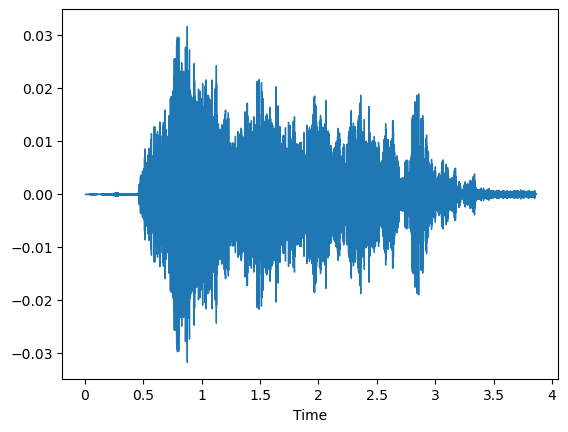

In [2]:
y, sr = librosa.load(r"C:\Users\surya\Downloads\speech_process.wav")
librosa.display.waveshow(y)

## Q1 

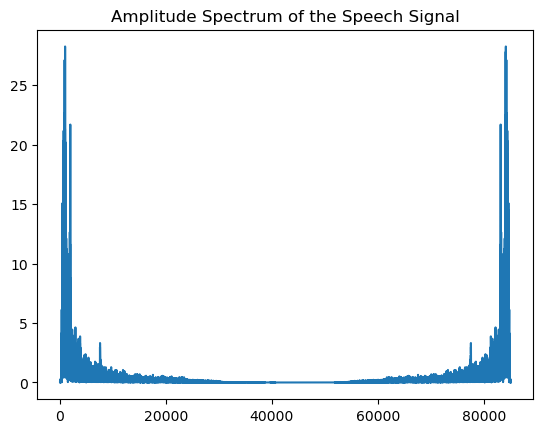

In [3]:
fft_y = np.fft.fft(y, n=None, axis=-1, norm=None)
amplitude = np.abs(fft_y)

# Plot the amplitude spectrum
plt.plot(amplitude)
plt.title("Amplitude Spectrum of the Speech Signal")
plt.show()

## Q 2 

[-1.25179299e-18+3.41227685e-19j  1.46042515e-19+7.14975574e-19j
  1.04316082e-18-1.49702020e-18j ... -1.42764545e-11-9.11142545e-19j
 -1.16890313e-11-1.80700565e-18j  4.36823595e-20+1.52309247e-20j]


C:\Users\surya\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


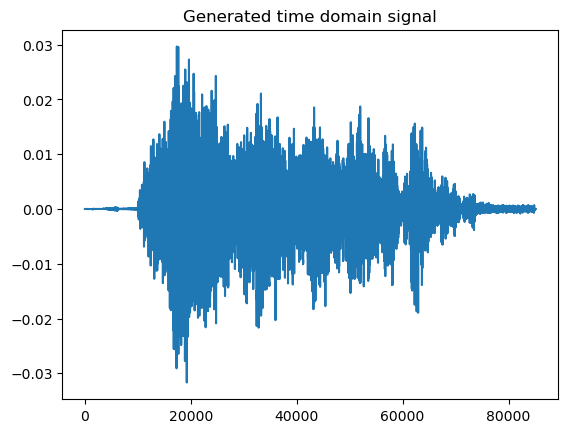

In [4]:
ifft_y = np.fft.ifft(fft_y, n=None, axis=-1, norm=None)
print(ifft_y)
# Plot the amplitude spectrum
plt.plot(ifft_y)
plt.title("Generated time domain signal")
plt.show()

## 3 

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Detect the silent intervals using librosa.effects.split()
intervals = librosa.effects.split(y, top_db = 20)
print(intervals)

# Create a list of segmented speech using the detected intervals
speech_segments = [y[start:end] for start, end in intervals]

[[10240 71168]]


In [6]:
from IPython.display import Audio, display
audio_segment = Audio(speech_segments[0], rate=sr)
display(audio_segment)

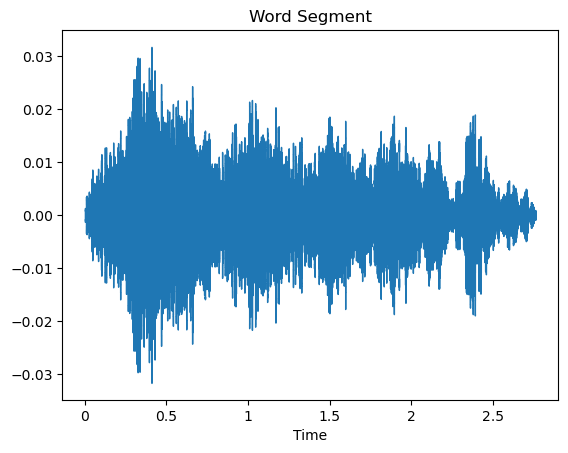

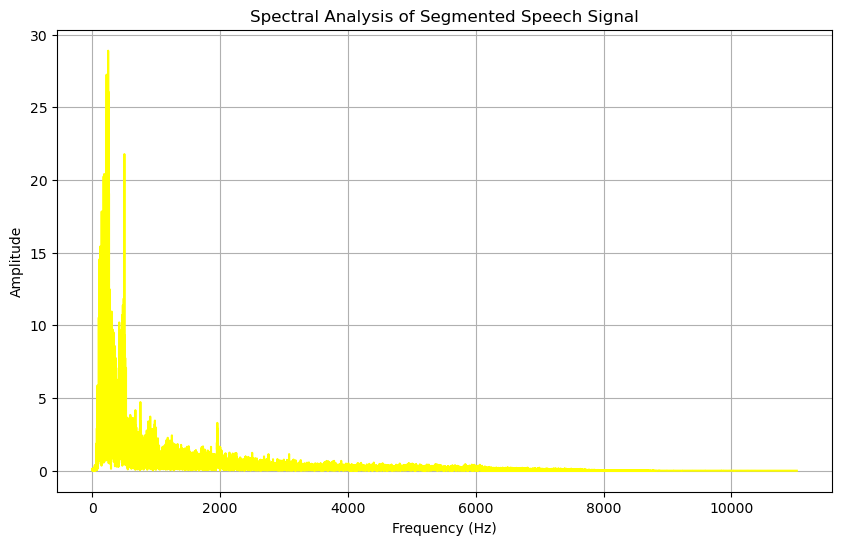

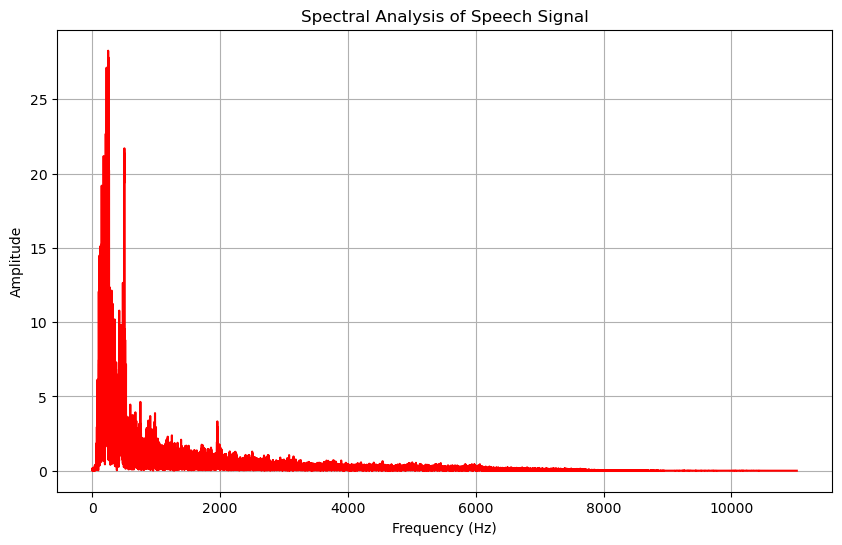

In [7]:
librosa.display.waveshow(speech_segments[0], sr=sr)
plt.title('Word Segment')
import IPython.display as ipd

# Play the audio of the word segment
ipd.Audio(speech_segments[0], rate=sr)

fft_output_seg = np.fft.fft(speech_segments[0])
seg_freq = np.fft.fftfreq(len(speech_segments[0]), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(seg_freq[:len(seg_freq)//2], np.abs(fft_output_seg)[:len(seg_freq)//2],color='yellow')  
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Segmented Speech Signal')
plt.grid(True)
plt.show()
fft_output = np.fft.fft(y)
f_freq = np.fft.fftfreq(len(y), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(f_freq[:len(f_freq)//2], np.abs(fft_output)[:len(f_freq)//2],color='red')  
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Speech Signal')
plt.grid(True)
plt.show()

## Q4 

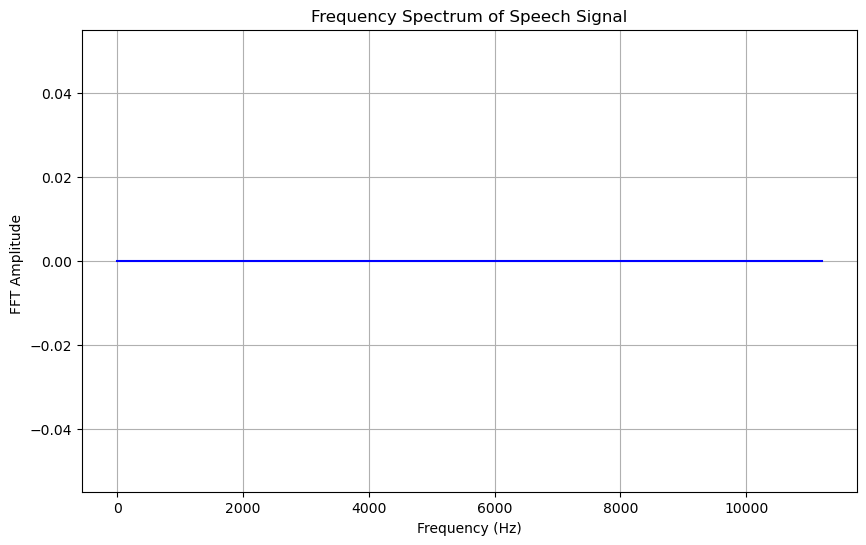

In [8]:
import numpy as np
from scipy.fft import fft
sr4=22500
w_duration = 0.02
w_samples = int(w_duration * sr4)
w_signal = y[:w_samples]

# Compute the FFT
X = fft(w_signal)

# Get the one-sided spectrum
n_oneside = w_samples // 2
frequencies = np.arange(n_oneside) * (sr4 / w_samples)
spectrum = np.abs(X[:n_oneside])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude ')
plt.title('Frequency Spectrum of Speech Signal')
plt.grid(True)
plt.show()

## Q5 

In [9]:
# Window length in samples (20 ms)
window_length = int(0.02 * sr)

# Hop length (50% overlap for smoother transitions)
hop_length = window_length // 2

# Compute STFT
stft = librosa.stft(y, n_fft=window_length, hop_length=hop_length)
print(stft)

[[ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -5.6495760e-03+0.0000000e+00j
  -2.0041803e-03+0.0000000e+00j -2.8946190e-10+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  4.8148134e-03-2.2939709e-03j
   7.7817921e-04+8.4023748e-04j  1.5813365e-10+2.7146987e-10j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -4.2867870e-03-1.5603592e-04j
  -1.6944939e-03+6.6379667e-04j  1.1663635e-10-3.9515999e-10j]
 ...
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  1.1993447e-07+2.3699518e-07j
  -2.0743177e-07+2.0310010e-08j  3.7590722e-09+5.9218377e-09j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  1.3633096e-08+3.2179003e-08j
   3.2421667e-08+3.2518702e-08j  5.1934994e-09+3.7460488e-09j]
 [ 0.0000000e+00+0.0000000e+00j  0.00000

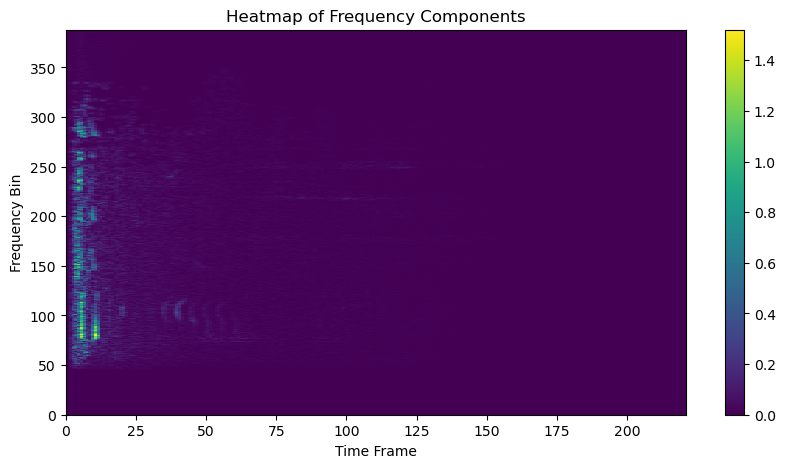

In [10]:
# Get magnitude of STFT (representing frequency component amplitudes)
amplitude = np.abs(stft)

# Stack frequency components as columns in a matrix
frequency_matrix = np.transpose(amplitude)

# Create a heatmap plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(frequency_matrix, vmin=0, vmax=np.max(amplitude))
plt.xlabel("Time Frame")
plt.ylabel("Frequency Bin")
plt.title("Heatmap of Frequency Components")
plt.colorbar()
plt.show()

##  Q6 

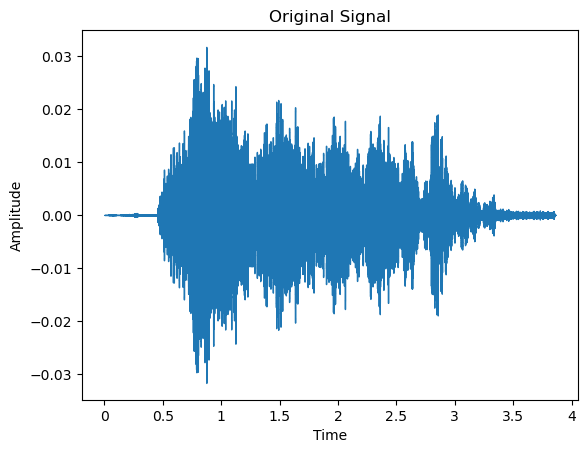

C:\Users\surya\AppData\Local\Temp\ipykernel_22812\3594957050.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


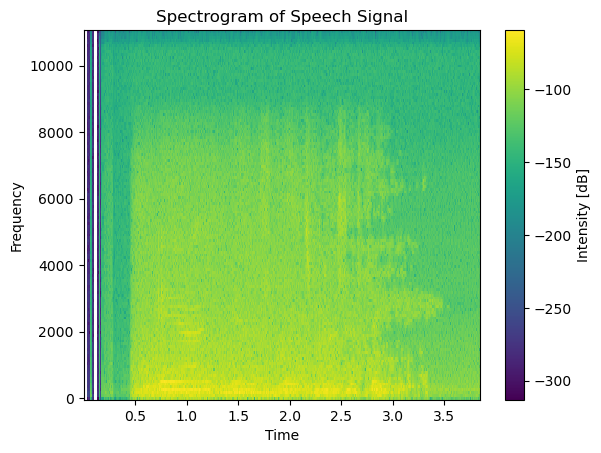

In [11]:
from scipy.signal import spectrogram

librosa.display.waveshow(y)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()